##Week 6 Lab(Lab #2)
####Author: Alejandro Mora

In [337]:
###Install packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Prophet
from fbprophet import Prophet
import timeit

#####Import Data and Review/Clean

In [338]:
#Import Zillow data set(files.zillowstatic.com/research/public/Zip/Zip_Zhvi_SingleFamilyResidence.csv)
zillow = pd.read_csv("Zillow.csv")

In [339]:
#View Datatypes
zillow.dtypes

RegionID        int64
SizeRank        int64
RegionName      int64
RegionType     object
StateName      object
               ...   
2019-11-30    float64
2019-12-31    float64
2020-01-31    float64
2020-02-29    float64
2020-03-31    float64
Length: 300, dtype: object

In [340]:
#View column names
zillow.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName', '1996-01-31',
       ...
       '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
       '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31'],
      dtype='object', length=300)

In [341]:
#View head of dataset
zillow.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,1999-04-30,1999-05-31,1999-06-30,1999-07-31,1999-08-31,1999-09-30,1999-10-31,1999-11-30,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1513130.0,1521683.0,1520682.0,1526830.0,1529485.0,1536433.0,1549683.0,1575387.0,1603481.0,1628358.0,1647174.0,1677270.0,1711039.0,1731261.0,1742661.0,1744659.0,1752491.0,1761396.0,1761418.0,1752466.0,1737604.0,1728035.0,1728620.0,1729029.0,1739112.0,1763236.0,1807891.0,184

In [342]:
#Remove StateName as they are the same values as State
del zillow['StateName']
#Remove Region Type as they are all Zip values
del zillow['RegionType']
#Remove RegionID as we only need the zipcodes
del zillow['RegionID']

In [343]:
#View missing NAs
zillow.isnull().sum(axis=1)

0         92
1          0
2        161
3          0
4          0
        ... 
30459    229
30460    204
30461    204
30462    264
30463    145
Length: 30464, dtype: int64

In [344]:
#Drop NA values
zillow = zillow.dropna()
zillow.head()

,SizeRank,RegionName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,1999-04-30,1999-05-31,1999-06-30,1999-07-31,1999-08-31,1999-09-30,1999-10-31,1999-11-30,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
1,1,60657,IL,Chicago,Chicago-Naperville-Elgin,Cook County,364892.0,364162.0,363605.0,362963.0,361660.0,361342.0,360662.0,361804.0,363561.0,366592.0,370077.0,372842.0,376806.0,380122.0,384081.0,385663.0,389062.0,389359.0,390182.0,388087.0,385729.0,381688.0,377848.0,376493.0,374914.0,375094.0,375012.0,378067.0,380789.0,386605.0,392801.0,400292.0,408057.0,416827.0,425087.0,432120.0,436962.0,441150.0,444482.0,447753.0,450885.0,455497.0,461395.0,467344.0,472584.0,477269.0,482728.0,487609.0,494719.0,501675.0,509751.0,516037.0,522884.0,528435.0,534252.0,540262.0,545385.0,550534.0,555476.0,562119.0,568170.0,573485.0,578283.0,584301.0,590710.0,596706.0,599876.0,602535.0,605907.0,610551.0,615389.0,618811.0,621376.0,623951.0,627538.0,630028.0,632219.0

In [345]:
#Create a percent change in house value as a determiner for top zipcodes for investment(from 1996-2020)
#First Date 1996-1-31, last date 2019-12-31
zillow['PercentChange'] = zillow.iloc[:, 294].div(zillow.iloc[:, 6])
zillow.tail()

,SizeRank,RegionName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,1999-04-30,1999-05-31,1999-06-30,1999-07-31,1999-08-31,1999-09-30,1999-10-31,1999-11-30,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,PercentChange
30401,34322,2872,RI,Portsmouth,Providence-Warwick,Newport County,143329.0,142713.0,142034.0,140600.0,139213.0,137542.0,136317.0,135753.0,135895.0,135943.0,135850.0,135850.0,136406.0,136569.0,137120.0,137279.0,137979.0,139739.0,141546.0,142807.0,142467.0,141558.0,140707.0,139750.0,138425.0,137404.0,136701.0,137123.0,137356.0,136210.0,134779.0,133282.0,133368.0,135231.0,137346.0,140059.0,142304.0,145352.0,146239.0,147586.0,148104.0,150676.0,152355.0,153639.0,154682.0,154751.0,156068.0,156694.0,158248.0,159084.0,161347.0,161384.0,162306.0,163694.0,166715.0,171196.0,174743.0,178671.0,180374.0,182209.0,183092.0,184593.0,185773.0,188913.0,191890.0,193154.0,193157.0,191383.0,191606.0,193040.0,195903.0,198820.0,201948.0,204763.0,20806

In [346]:
###Melt columns to rows for time series
#Create a dataframe with months and prices
Date = zillow.loc[:, zillow.columns.str.contains('^1996|^1997|^1998|^1999|^2000|^2001|^2002|^2003|^2004|^2005|^2006|^2007|^2008|^2009|^2010|^2011|^2012|^2013|^2014|^2015|^2016|^2017|^2018|^2019|^2020')]
#melt the dataframe by months and their prices
zillow = zillow.melt(id_vars = ['RegionName','SizeRank','State','City','Metro','CountyName','PercentChange']
                     , var_name = "Year"
                     , value_name = "Price")
zillow.head()

,RegionName,SizeRank,State,City,Metro,CountyName,PercentChange,Year,Price
0,60657,1,IL,Chicago,Chicago-Naperville-Elgin,Cook County,2.663906,1996-01-31,364892.0
1,77494,3,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1.675321,1996-01-31,200475.0
2,60614,4,IL,Chicago,Chicago-Naperville-Elgin,Cook County,2.191985,1996-01-31,546663.0
3,77449,5,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1.943397,1996-01-31,97521.0
4,77084,7,TX,Houston,Houston-The Woodlands-Sugar Land,Harris County,1.917623,1996-01-31,97381.0


In [364]:
#Convert year to datetime values
zillow['Year'] = pd.to_datetime(zillow['Year'],format='%Y-%m-%d')
zillow.dtypes
#Convert RegionName to categorical
zillow['RegionName'] = zillow['RegionName'].astype('category')

RegionName             category
SizeRank                  int64
State                    object
City                     object
Metro                    object
CountyName               object
PercentChange           float64
ds               datetime64[ns]
y                       float64
dtype: object

In [348]:
##Take top 25% of Size Ranking(Size is based on population of zipcode ranking, Most urbanized)
#https://sls.gatech.edu/sites/default/files/documents/Toolkit-Docs/hong_fieldguide_zillow.pdf
#length of zillow
(len(zillow.index))
#take 25 quantile based on SizeRank and make a subset dataframe
Q25 = zillow.SizeRank.quantile(q=0.25)
zillow_25= zillow[zillow['SizeRank']<Q25].drop(['SizeRank'], axis = 1)
zillow_25.tail()

,RegionName,State,City,Metro,CountyName,PercentChange,Year,Price
3492573,21030,MD,Cockeysville,Baltimore-Columbia-Towson,Baltimore County,1.958542,2020-03-31,399016.0
3492574,80919,CO,Colorado Springs,Colorado Springs,El Paso County,2.310041,2020-03-31,445683.0
3492575,28602,NC,Hickory,Hickory-Lenoir-Morganton,Catawba County,1.671611,2020-03-31,150566.0
3492576,99216,WA,Spokane Valley,Spokane-Spokane Valley,Spokane County,2.393719,2020-03-31,279651.0
3492577,77021,TX,Houston,Houston-The Woodlands-Sugar Land,Harris County,1.961909,2020-03-31,153432.0


In [365]:
##Take top 10 Percent Changes(limit one zip code per city to avoid city bias)
zillow_top10 = zillow_25.groupby(['City','RegionName'], as_index=False)['PercentChange'].max()            
#Drop NAs
zillow_top10 = zillow_top10.dropna()
#Sort cities
zillow_top10 = zillow_top10.sort_values('PercentChange', ascending=False)
zillow_top10.head(50)
#Most results revolve around Los Angeles, only one will be used and the rest can be picked from different areas going down the list
zillow_top10DF = pd.DataFrame(zillow_top10.iloc[[2,6,11,18,23,24,25,27,44,45],:])
zillow_top10DF

#Merge top 10 zipcodes with yearly house prices
zillowFinal = zillow_top10DF.merge(zillow_25,how='left', on='RegionName')
#Delete uneccessary columns
del zillowFinal['PercentChange_y']
del zillowFinal['City_y']
#Rename columns
zillowFinal = zillowFinal.rename(columns={"City_x": "City", "PercentChange_x": "PercentChange"})

,City,RegionName,PercentChange
8589910,Los Angeles,90027,13.177882
11189873,Oakland,94610,11.615760
10530531,New York,11216,10.002523
13968986,San Diego,92104,8.252543
11730894,Palm Springs,92264,7.389656
7124568,Jersey City,7302,7.340233
12192720,Philadelphia,19125,7.302028
642527,Atlanta,30310,7.262044
131473,Alameda,94501,6.550516
1540491,Boston,2125,6.514605


In [350]:
#Rename columns for Prophet use
zillow = zillow.rename(index=str, columns={"Price": "y", "Year": "ds"})
zillowFinal = zillowFinal.rename(index=str, columns={"Price": "y", "Year": "ds"})
zillowFinal.head()
zillowFinal.dtypes

City                     object
RegionName             category
PercentChange           float64
State                    object
Metro                    object
CountyName               object
ds               datetime64[ns]
y                       float64
dtype: object

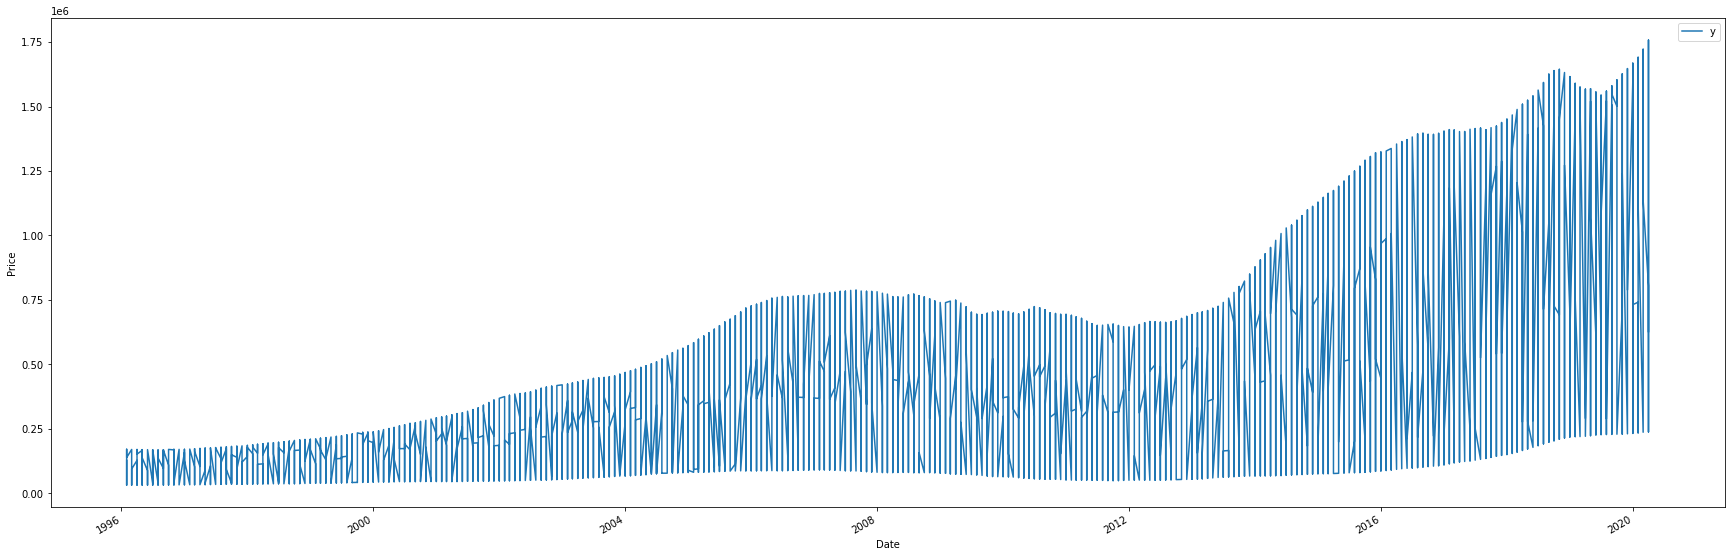

In [351]:
#DF for plotting
zillowplot = zillowFinal[['ds','y']]
zillowplot = zillowplot.set_index('ds')
#Plot time series for visualization
ax = zillowplot.plot(figsize=(30, 10), y ='y')
ax.set_ylabel('Price')
ax.set_xlabel('Date')

plt.show()

#####Create plot for Arkansas Metro Areas to view possible trends and subsets

In [352]:
#Metro Areas in Arkansas time series
#filter out state, then metro area

#State
Sfilter_list = ['AR']
zillow_filter1 = zillow[zillow.State.isin(Sfilter_list)]
#Metro
Cfilter_list = ['Hot Springs','Little Rock','Fayetteville','Searcy']
zillow_filter2 = zillow_filter1[zillow_filter1.City.isin(Cfilter_list)]
zillow_filter2.head()
zillow_filter2.dtypes

#Group Averages of price per month, by cominved zipcode of each metro city
#Hot Springs
HS = ['Hot Springs']
HotS = zillow_filter2[zillow_filter2.City.isin(HS)]
HotSAvg = pd.DataFrame((HotS.groupby(['ds','RegionName','City'], as_index=False).mean().groupby('ds')['y'].mean()))
#Little Rock
LR = ['Little Rock']
Little = zillow_filter2[zillow_filter2.City.isin(LR)]
LittleAvg = pd.DataFrame((Little.groupby(['ds','RegionName','City'], as_index=False).mean().groupby('ds')['y'].mean()))
#Fayetteville
F = ['Fayetteville']
Fayette = zillow_filter2[zillow_filter2.City.isin(F)]
FayAvg = pd.DataFrame((Fayette.groupby(['ds','RegionName','City'], as_index=False).mean().groupby('ds')['y'].mean()))
#Searcy
SC = ['Searcy']
Sear = zillow_filter2[zillow_filter2.City.isin(SC)]
SearAvg = pd.DataFrame((Sear.groupby(['ds','RegionName','City'], as_index=False).mean().groupby('ds')['y'].mean()))

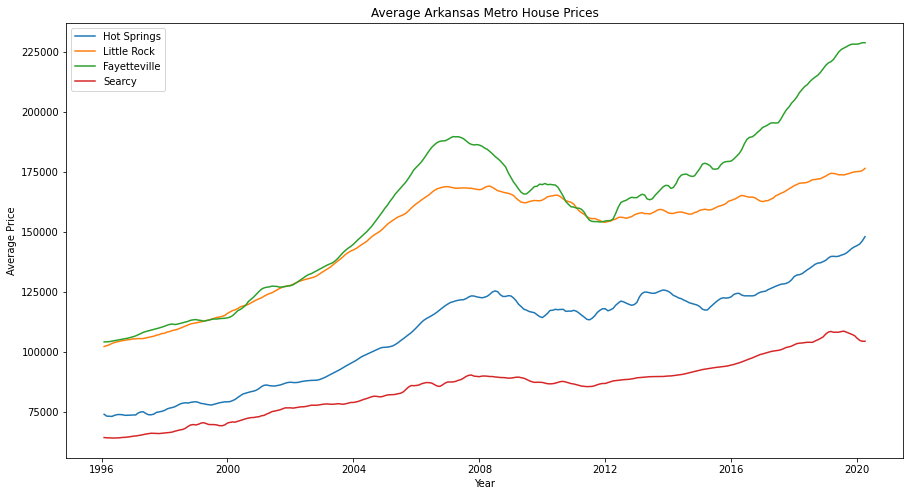

In [353]:
#Plot time series of Metro areas in Arkansas
plt.subplots(figsize=(15,8))
plt.plot(HotSAvg.index, HotSAvg.y)
plt.plot(LittleAvg.index, LittleAvg.y)
plt.plot(FayAvg.index, FayAvg.y)
plt.plot(SearAvg.index, SearAvg.y)
plt.legend(["Hot Springs","Little Rock","Fayetteville","Searcy"])
plt.title("Average Arkansas Metro House Prices")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.show()

#####Model based on top 25% of SizeRanking and Percent Changes in Prices

In [354]:
####Cleaning for final model
#Group the zipcodes by average prices
zillow_AVG = pd.DataFrame((zillowFinal.groupby(['ds','RegionName'], as_index=False).mean()))
zillow_AVG = zillow_AVG.dropna()
zillow_AVG.dtypes

ds               datetime64[ns]
RegionName             category
PercentChange           float64
y                       float64
dtype: object

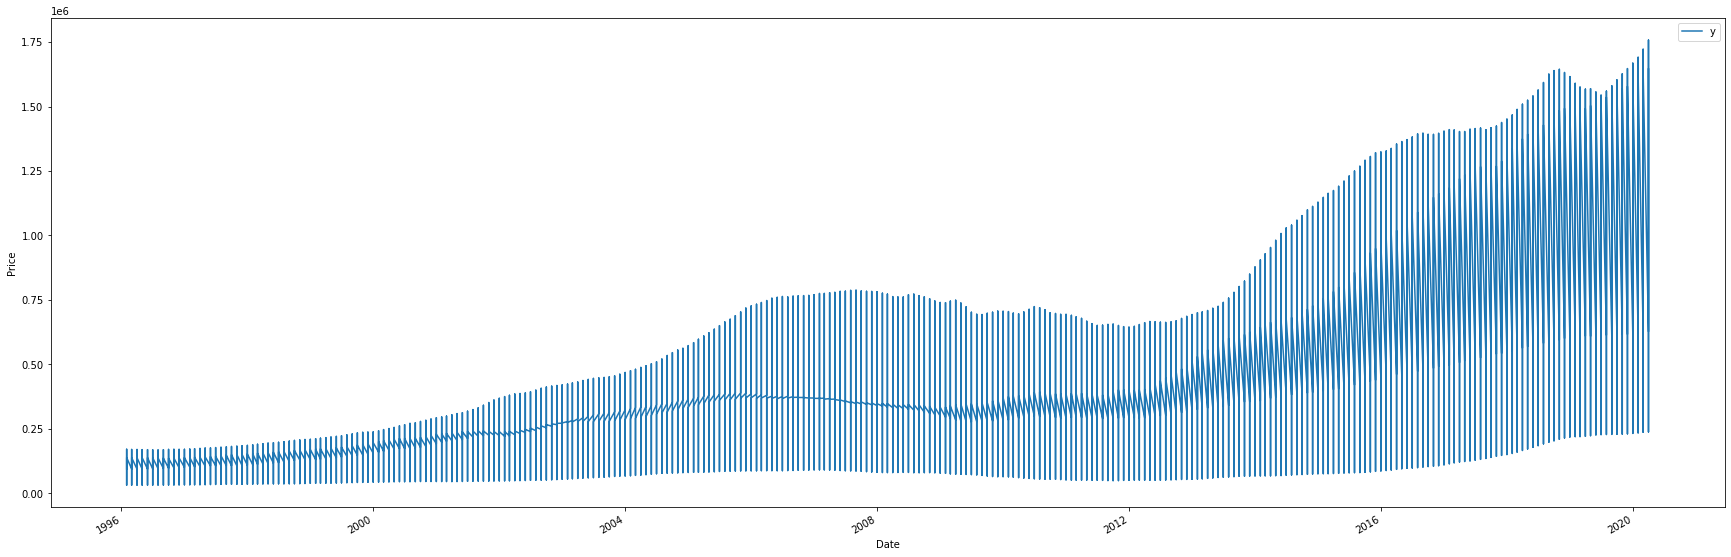

In [355]:
#DF for plotting
zillowplot2 = zillow_AVG[['ds','y']]
#Plot AVG time series for visualization
ax = zillow_AVG.set_index('ds').plot(figsize=(30, 10), y ='y')
ax.set_ylabel('Price')
ax.set_xlabel('Date')

plt.show()

In [356]:
#Create test and training data
zillow_train = zillow_AVG.loc[zillow_AVG['ds'] <= '2020-1-1']
zillow_test = zillow_AVG.loc[zillow_AVG['ds'] >= '2020-1-1']

#####Model

In [357]:
#Model
zillow_model1 = Prophet(interval_width=0.95)
#Fit Model
zillow_model1.fit(zillow_train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [358]:
#Create future dates for model prediction
future_dates = zillow_model1.make_future_dataframe(periods=60, freq='M')
future_dates.tail()

,ds
343,2024-08-31
344,2024-09-30
345,2024-10-31
346,2024-11-30
347,2024-12-31


In [359]:
#Predict future trend
forecast1 = zillow_model1.predict(future_dates)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
343,2024-08-31,1.382526e+06,866108.249612,1.863124e+06
344,2024-09-30,1.388581e+06,927003.332834,1.847662e+06
345,2024-10-31,1.395795e+06,934565.518135,1.876599e+06
346,2024-11-30,1.403470e+06,933230.420415,1.846740e+06
347,2024-12-31,1.411387e+06,933691.856513,1.916945e+06


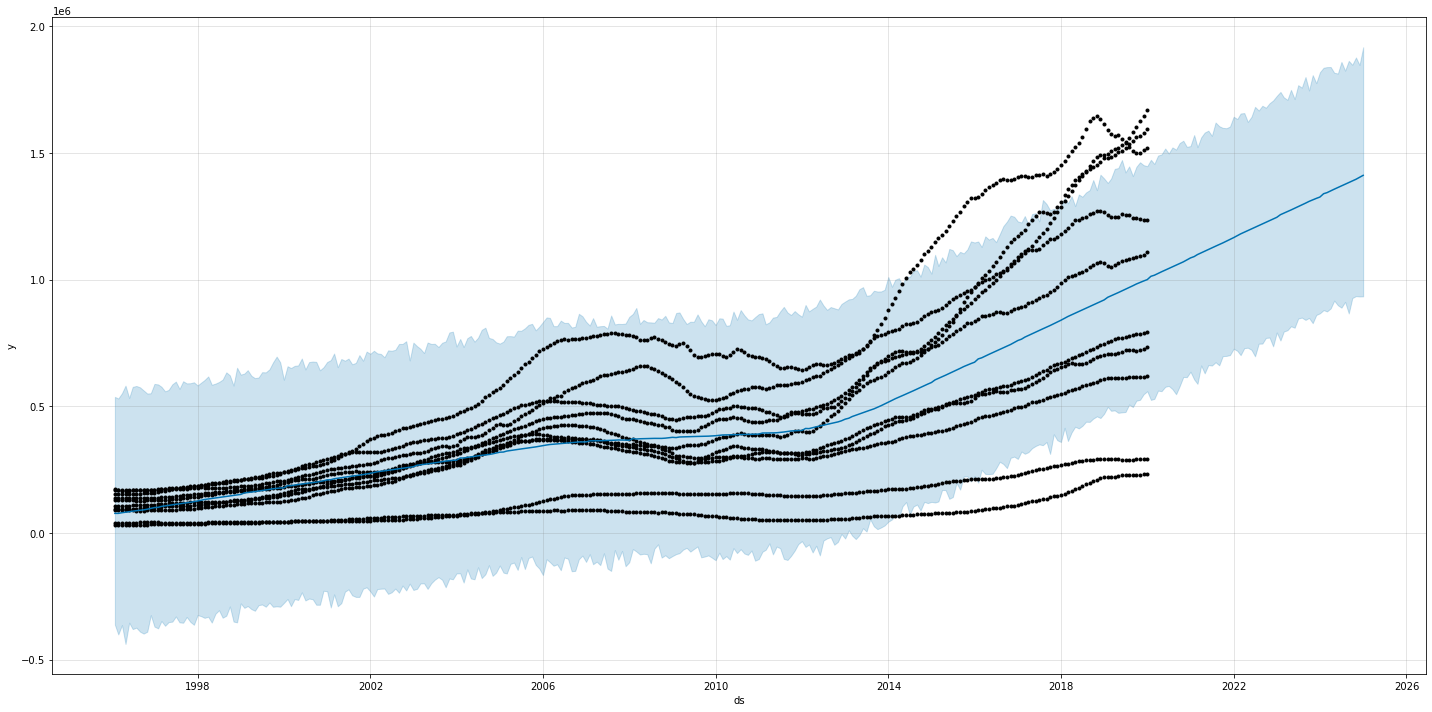

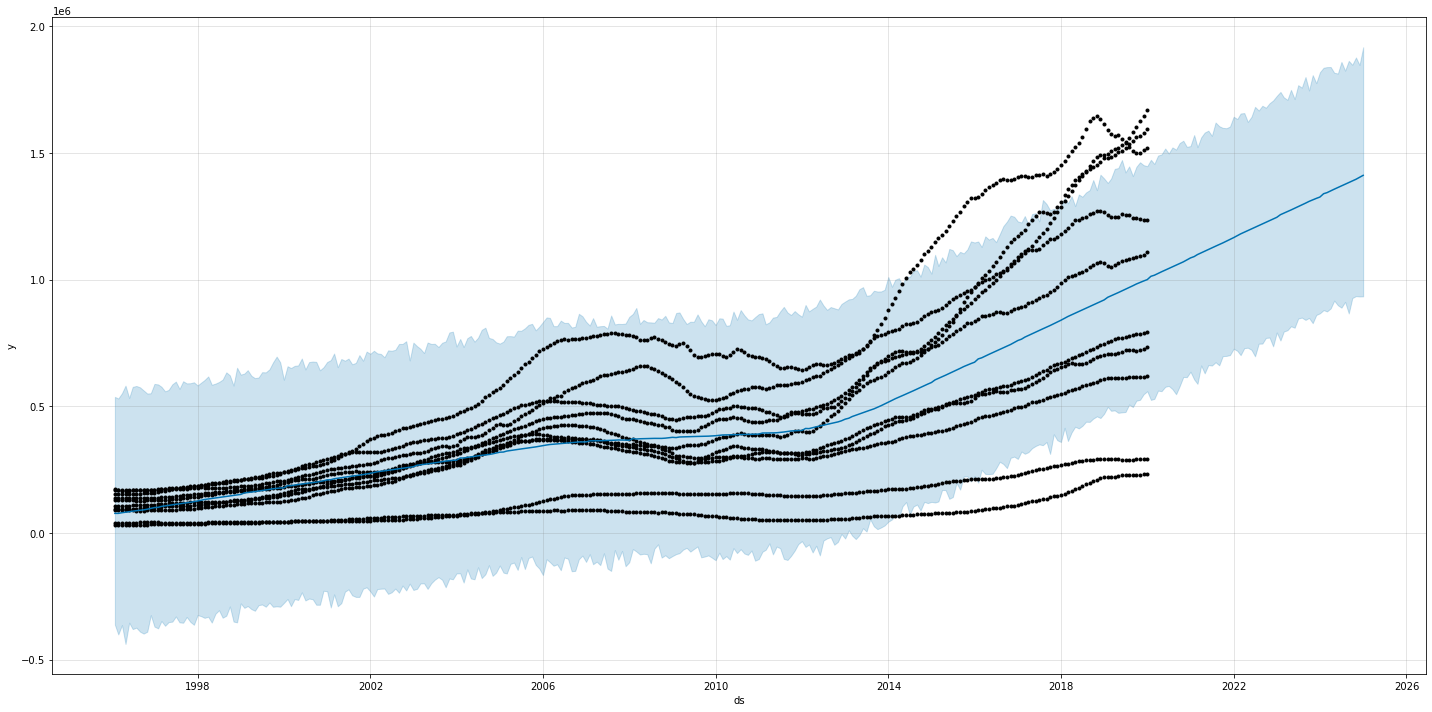

In [360]:
#Plot prediction
zillow_model1.plot(forecast1, uncertainty=True, figsize=(20,10))

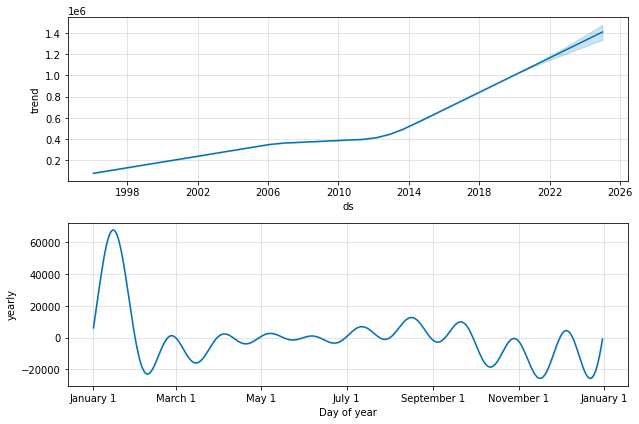

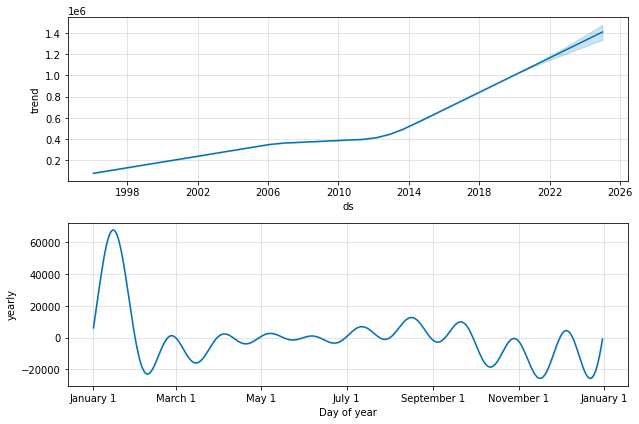

In [361]:
#Plot components
zillow_model1.plot_components(forecast1)

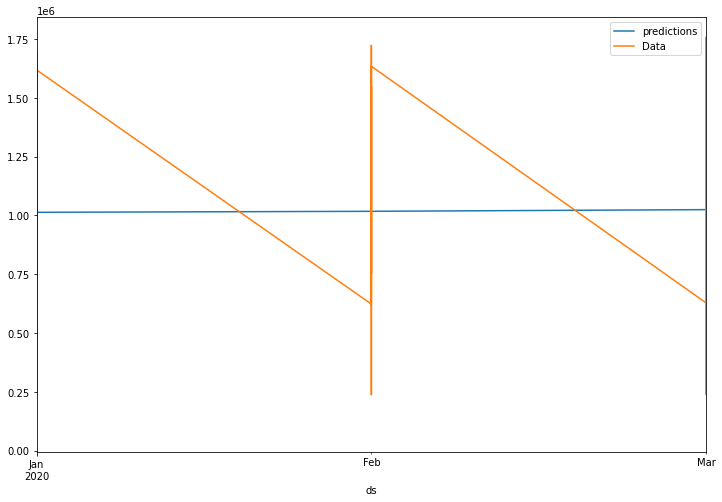

In [362]:
ax=forecast1.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
zillow_test.plot(x='ds',y='y',legend=True,label='Data',ax=ax,xlim=('2020-01-01','2020-03-01'))

######Apply model to get predicted percentage change results

In [363]:
#Merge predictions with RegionNames
predicted = forecast1.merge(zillow_AVG, how='left', on='ds')

#Actual return based on trendline
predicted['TrendDiff'] =  predicted["y"] - predicted["trend"]

#Take the last year before predicted dates to see which ones are doing the best(based on model)
besthouses = predicted[(predicted['ds'] == '2019-12-31') ]
besthouses = besthouses.sort_values('TrendDiff', ascending=False)
besthouses[['RegionName','TrendDiff','PercentChange']].head(3)

,RegionName,TrendDiff,PercentChange
2875,90027,664809.532027,13.177882
2879,94610,592592.532027,11.615760
2872,11216,517118.532027,10.002523
